<a href="https://colab.research.google.com/github/elvisiraguha/stock-markets-analytics-zoomcamp/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lxml

In [ ]:
import pandas as pd

## Question 1: [Index] S&P 500 Stocks Added to the Index

In [ ]:
data_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(data_url)
df = df[0][['Symbol', 'Security', 'Date added']]

In [ ]:
# group by year added
df['year'] = pd.to_datetime(df['Date added']).dt.year


In [ ]:
top_years_added = df.groupby('year').count().sort_values(by="Date added", ascending=False).iloc[:5]

In [ ]:
top_years_added

,Symbol,Security,Date added
year,,,
1957,53,53,53
2016,23,23,23
2017,23,23,23
2019,22,22,22
2008,17,17,17


In [ ]:
stocks_older_than_20_years = df[df['year'] < (pd.to_datetime('today').year - 20)]

In [ ]:
len(stocks_older_than_20_years)

219

## Question 2. [Macro] Indexes YTD (as of 1 May 2025)

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
ts = ['^GSPC', '000001.SS', '^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX', '^BVSP']
df = yf.download(ts, start='2025-01-01', end='2025-05-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


In [ ]:
closes = df['Close']
cleaned = closes.dropna()
ytd_returns = (cleaned.iloc[-1] - cleaned.iloc[0]) / cleaned.iloc[0]

In [ ]:
gspc_return = ytd_returns['^GSPC']
better_than_gspc = ytd_returns[ytd_returns > gspc_return]

In [ ]:
len(better_than_gspc)

9

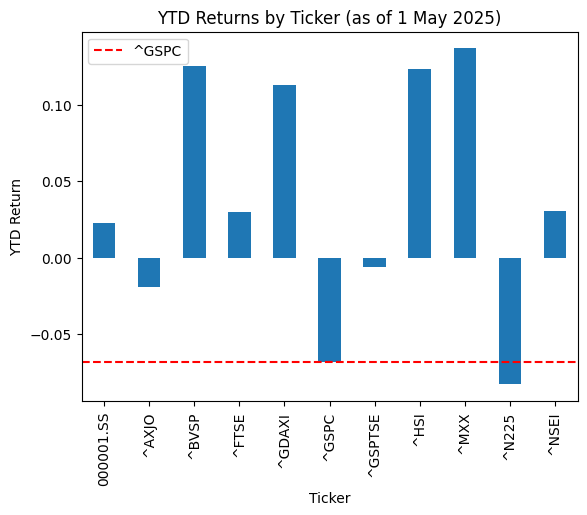

In [ ]:
ytd_returns.plot(kind='bar', title='YTD Returns by Ticker (as of 1 May 2025)')
plt.axhline(y=gspc_return, color='r', linestyle='--', label='^GSPC')
plt.xlabel('Ticker')
plt.ylabel('YTD Return')
plt.legend()

## Question 3. [Index] S&P 500 Market Corrections Analysis

In [ ]:
df_sp500 = yf.Ticker('^GSPC').history(start='1950-01-01')

In [ ]:
df_sp500['cummax'] = df_sp500['Close'].cummax()
df_sp500['is_all_time_high'] = (df_sp500['Close'] == df_sp500['cummax'])

In [ ]:
df_sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,cummax,is_all_time_high
Date,,,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0.0,0.0,16.660000,True
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0.0,0.0,16.850000,True
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0.0,0.0,16.930000,True
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0.0,0.0,16.980000,True
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0.0,0.0,17.080000,True
...,...,...,...,...,...,...,...,...,...
2025-05-23 00:00:00-04:00,5781.890137,5829.509766,5767.410156,5802.819824,4662820000,0.0,0.0,6144.149902,False
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0,6144.149902,False
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0,6144.149902,False


In [ ]:
# prompt: For each pair of consecutive all-time highs, find the minimum price in between

highs = df_sp500[df_sp500['Close'] == df_sp500['all_time_high']].index
min_prices = []
for i in range(len(highs) - 1):
    start_date = highs[i]
    end_date = highs[i+1]
    min_price = df_sp500['Close'][start_date:end_date].min()
    min_prices.append(min_price)

# min_prices

[16.65999984741211,
 16.850000381469727,
 16.93000030517578,
 16.979999542236328,
 17.030000686645508,
 16.670000076293945,
 17.229999542236328,
 17.290000915527344,
 16.989999771118164,
 17.06999969482422,
 17.450000762939453,
 17.440000534057617,
 17.549999237060547,
 17.559999465942383,
 17.290000915527344,
 17.6299991607666,
 17.780000686645508,
 17.75,
 17.940000534057617,
 17.8799991607666,
 18.030000686645508,
 17.760000228881836,
 18.110000610351562,
 18.1200008392334,
 18.270000457763672,
 18.270000457763672,
 18.290000915527344,
 18.18000030517578,
 18.440000534057617,
 18.520000457763672,
 18.559999465942383,
 18.600000381469727,
 18.670000076293945,
 18.719999313354492,
 18.770000457763672,
 18.600000381469727,
 18.8799991607666,
 18.93000030517578,
 19.139999389648438,
 19.260000228881836,
 16.68000030517578,
 19.139999389648438,
 19.450000762939453,
 19.65999984741211,
 19.889999389648438,
 19.360000610351562,
 20.15999984741211,
 19.0,
 20.3799991607666,
 20.430000305175

Calculated Drawdown Percentages:
[0.0, 0.0, 0.0, 0.0, 0.2927355812873911, 2.4575779552017494, 0.0, 0.0, 1.9053113713660714, 1.4434180392896205, 0.0, 0.2858732859626009, 0.0, 0.0, 1.537577213135463, 0.0, 0.0, 0.5602262147486451, 0.0, 0.556175661933797, 0.0, 1.6066427725009558, 0.6037250666760743, 0.8210159538695164, 0.0, 0.0, 0.0, 0.60142484879909, 0.0, 0.0, 0.0, 0.4282651092028549, 0.21378412686244297, 0.0, 0.05324935312141452, 1.0111789505055744, 0.0, 0.0, 0.0, 0.0, 14.020615292983996, 1.5432157210263302, 0.0, 0.15236508802331364, 0.5500030517578125, 3.777336964121086, 0.0, 6.4960615878377235, 0.0, 0.0, 0.38517054377893045, 0.0, 0.0, 0.0, 1.2784112075512217, 0.37753620429350554, 0.0, 0.0, 2.412986398258303, 0.0, 0.3679849335248636, 0.0, 0.0, 4.2792825688789105, 0.0, 0.0, 0.0, 0.0, 8.11047972285998, 0.0, 0.0, 0.0, 1.4329132169649172, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5080475654940457, 1.8979286080424957, 0.7566216824241399, 6.0796676718966935, 0.0, 0.7525096346223327, 0.0, 0.4139088

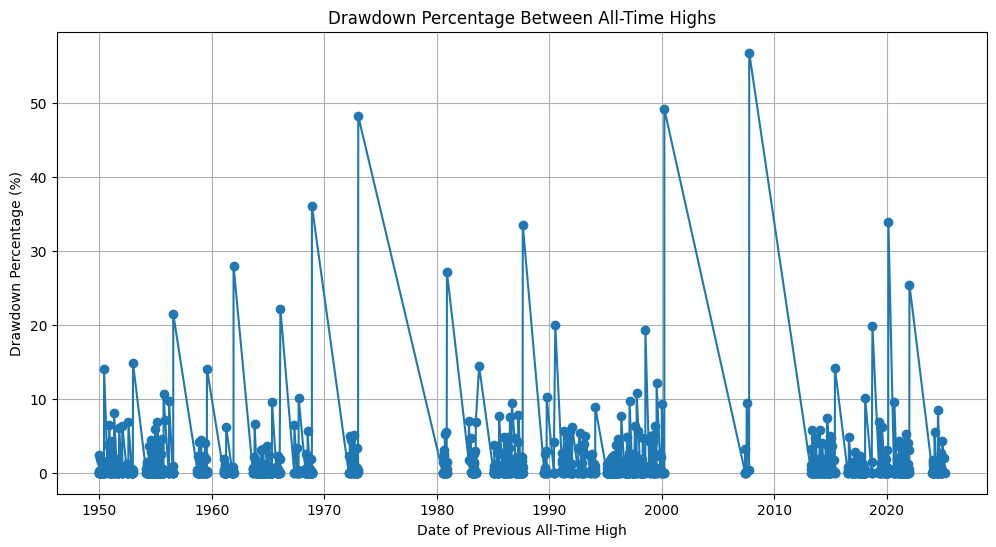

In [ ]:
# prompt: Calculate drawdown percentages: (high - low) / high × 100

def calculate_drawdowns(highs, lows):
  """Calculates drawdown percentages between corresponding high and low values.

  Args:
    highs: A list or pandas Series of high prices.
    lows: A list or pandas Series of corresponding low prices.

  Returns:
    A list of drawdown percentages.
  """
  drawdowns = []
  for high, low in zip(highs, lows):
    if high != 0:  # Avoid division by zero
      drawdown = ((high - low) / high) * 100
      drawdowns.append(drawdown)
    else:
      drawdowns.append(0) # or some other indicator for invalid calculation
  return drawdowns

# Now you can use this function with the highs and min_prices you calculated
# Note that `highs` is a list of datetime indices. We need the actual close prices
# at those high points to calculate the drawdown correctly.
actual_high_prices = df_sp500['Close'][highs]

drawdown_percentages = calculate_drawdowns(actual_high_prices, min_prices)

# You can then analyze or visualize these drawdown percentages
print("Calculated Drawdown Percentages:")
print(drawdown_percentages)

# For example, you might want to find the largest drawdown:
largest_drawdown = max(drawdown_percentages)
print(f"\nLargest Drawdown Percentage: {largest_drawdown:.2f}%")

# Or plot the drawdowns over time
plt.figure(figsize=(12, 6))
plt.plot(highs[:-1], drawdown_percentages, marker='o', linestyle='-')
plt.title('Drawdown Percentage Between All-Time Highs')
plt.xlabel('Date of Previous All-Time High')
plt.ylabel('Drawdown Percentage (%)')
plt.grid(True)
plt.show()

## Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)